# Installing and importing

In [ ]:
%pip install paddlepaddle-gpu -q
%pip install paddleocr -q
%pip install --quiet vietocr
%pip install paddlepaddle -q

In [4]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from paddleocr import PaddleOCR, draw_ocr

# Ultilities

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR
!git clone https://github.com/pbcquoc/vietocr

In [12]:
FONT = '/content/PaddleOCR/doc/fonts/latin.ttf'
def predict(recognitor, detector, img_path, save_path, padding=4, dpi=200):
    # Load image
    img = cv2.imread(img_path)

    # Text detection
    result = detector.ocr(img_path, cls=False, det=True, rec=False)
    result = result[:][:][0]

    # Filter Boxes
    boxes = []
    for line in result:
        boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])
    boxes = boxes[::-1]

    # Add padding to boxes
    padding = 4
    for box in boxes:
        box[0][0] = box[0][0] - padding
        box[0][1] = box[0][1] - padding
        box[1][0] = box[1][0] + padding
        box[1][1] = box[1][1] + padding

    # Text recognizion
    texts = []
    for box in boxes:
        cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
        try:
            cropped_image = Image.fromarray(cropped_image)
        except:
            continue

        rec_result = recognitor.predict(cropped_image)

        text = rec_result#[0]

        texts.append(text)
        #print(text)

    # Convert boxes to draw
    def get_rectangle_points(x1, y1, x2, y2):
        x_tl = x1
        y_tl = y2
        x_br = x2
        y_br = y1
        return [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]
    _boxes = [get_rectangle_points(boxe[0][0], boxe[0][1], boxe[1][0], boxe[1][1]) for boxe in boxes]

    # Draw boxes and texts
    img = draw_ocr(img, _boxes, texts, scores=None, font_path=FONT)


    # Save image
    img_name = img_path.split('/')[-1]
    cv2.imwrite(os.path.join(save_path, img_name), img)

    # Display image
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    height, width, depth = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

    return boxes, texts

def display_image_in_actual_size(img_path, dpi=200):
  im_data = cv2.imread(img_path)

  height, width, depth = im_data.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data, cmap='gray')

  plt.show()

# Configuration

In [7]:
# Config of PaddleOCR
detector = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:00<00:00, 4.94MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/latin_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer/latin_PP-OCRv3_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:01<00:00, 9.46MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:01<00:00, 2.12MiB/s]

[2023/04/04 17:53:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr

In [8]:
# Configure of VietOCR
config = Cfg.load_config_from_name('vgg_transformer')

config['cnn']['pretrained'] = True
config['predictor']['beamsearch'] = True
config['device'] = 'cuda:0'

recognitor = Predictor(config)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:02<00:00, 232MB/s]
18533it [00:00, 30452.59it/s]


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Only VietOCR

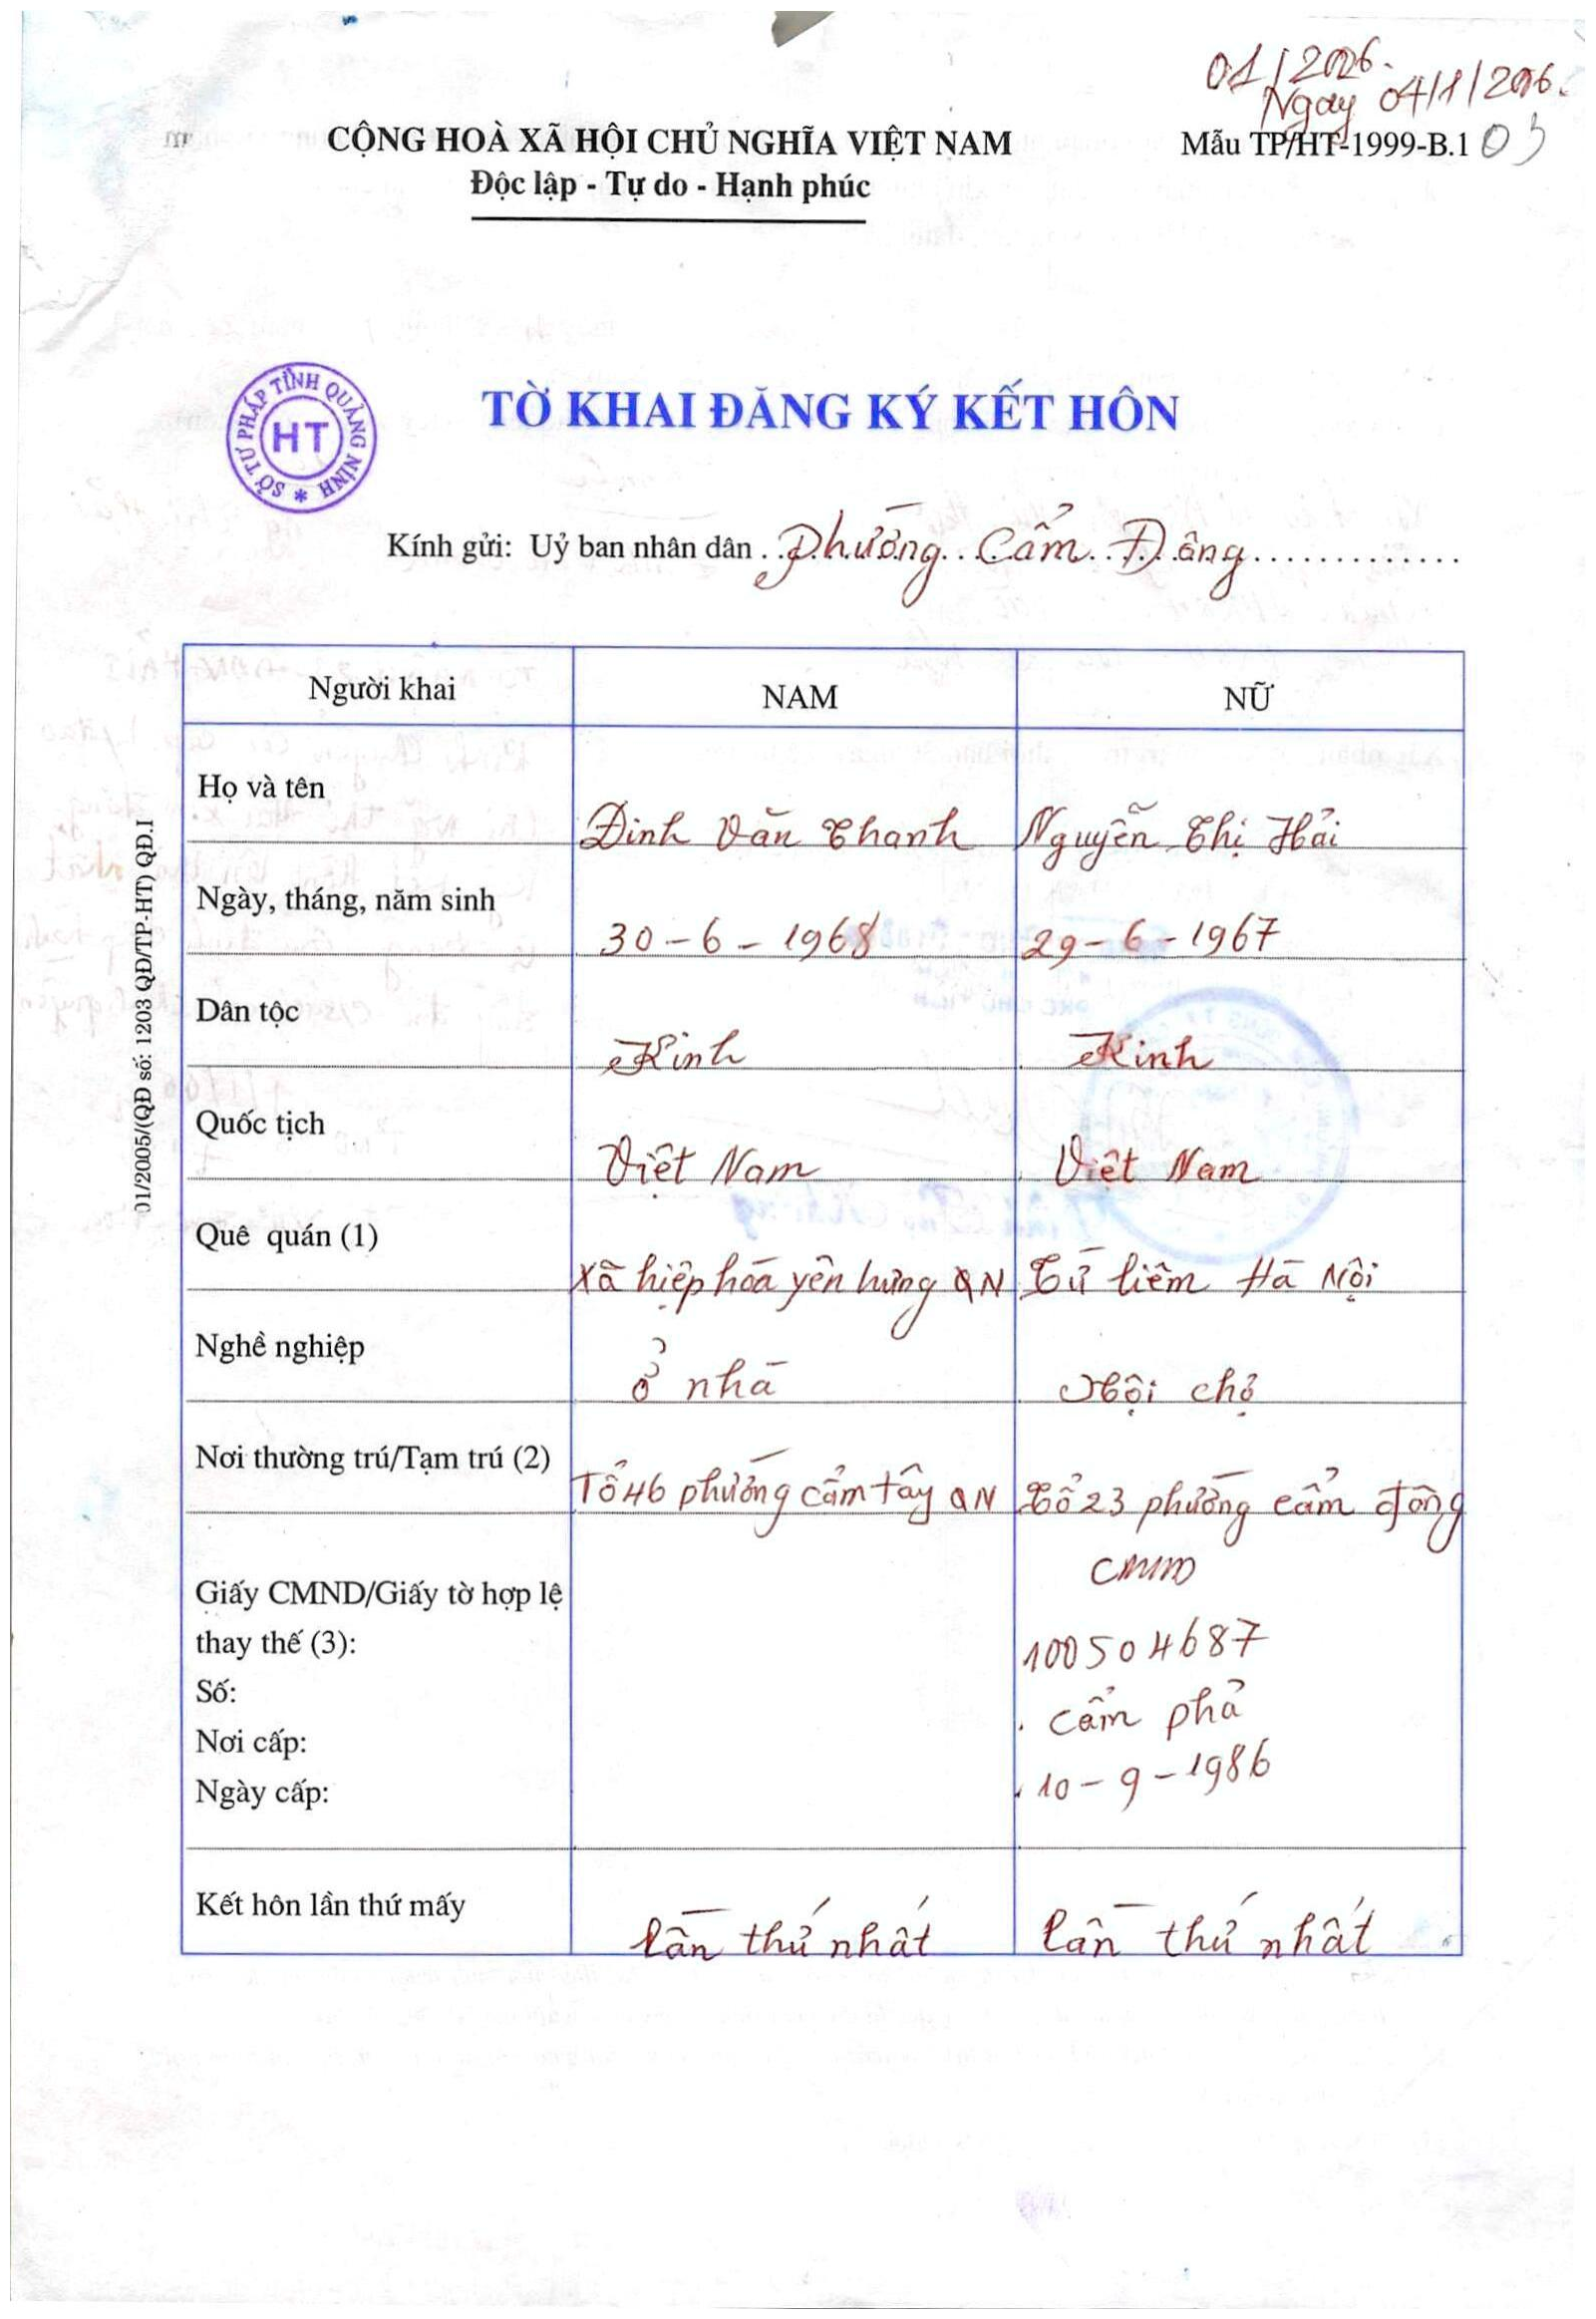

'11'

In [10]:
img_path = '/content/drive/MyDrive/doan/1.jpg'

img = cv2.imread(img_path)
img = Image.fromarray(img)
rec_result = recognitor.predict(img)

display_image_in_actual_size(img_path, dpi=100)

rec_result

# Paddle + VietOCR

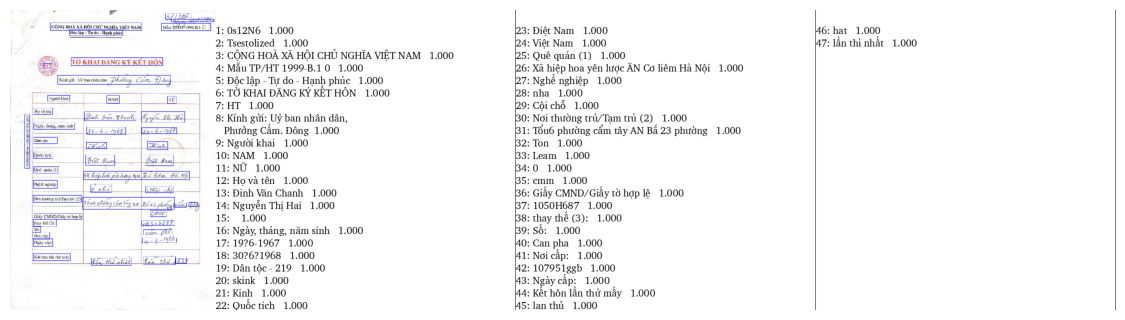

[[1192, 30], [1391, 72]]: 0s12N6
[[1239, 70], [1566, 91]]: Tsestolized
[[309, 99], [1011, 155]]: CỘNG HOÀ XÃ HỘI CHỦ NGHĨA VIỆT NAM
[[1163, 102], [1543, 158]]: Mẫu TP/HT 1999-B.1 0
[[455, 150], [867, 196]]: Độc lập - Tự do - Hạnh phúc
[[469, 366], [1173, 427]]: TỜ KHAI ĐĂNG KÝ KẾT HÔN
[[260, 409], [319, 446]]: HT
[[366, 500], [1230, 571]]: Kính gửi: Uỷ ban nhân dân, Phưởng Cầm. Đông
[[290, 654], [458, 703]]: Người khai
[[744, 656], [839, 716]]: NAM
[[1208, 664], [1279, 715]]: NỮ
[[180, 753], [329, 801]]: Họ và tên
[[571, 783], [968, 852]]: Đinh Văn Chanh
[[1009, 781], [1342, 864]]: Nguyễn Thị Hai
[[114, 803], [152, 1217]]: 
[[182, 868], [496, 917]]: Ngày, tháng, năm sinh
[[1012, 905], [1282, 950]]: 19?6-1967
[[589, 899], [889, 955]]: 30?6?1968
[[180, 978], [362, 1027]]: Dân tộc - 219
[[586, 1015], [744, 1067]]: skink
[[1055, 1012], [1213, 1073]]: Kinh
[[182, 1091], [326, 1140]]: Quốc tịch
[[582, 1114], [804, 1194]]: Điệt Nam
[[1041, 1114], [1253, 1197]]: Việt Nam
[[182, 1204], [376, 12

In [17]:
input_path = '/content/drive/MyDrive/doan/1.jpg'
output_path = '/content/'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=200)
for i, (box, text) in enumerate(zip(boxes, texts)):
  print("{}: {}".format(box, text))

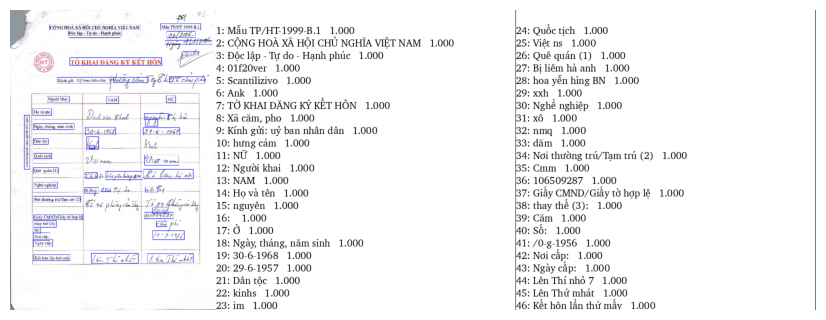

[[1158, 104], [1465, 153]]: Mẫu TP/HT-1999-B.1
[[305, 111], [999, 153]]: CỘNG HOÀ XÃ HỘI CHỦ NGHĨA VIỆT NAM
[[446, 157], [857, 199]]: Độc lập - Tự do - Hạnh phúc
[[1206, 163], [1422, 214]]: 01f20ver
[[1191, 233], [1552, 264]]: Scantilizivo
[[1325, 320], [1449, 353]]: Ank
[[458, 366], [1166, 424]]: TỜ KHAI ĐĂNG KÝ KẾT HÔN
[[1224, 512], [1496, 561]]: Xã căm, pho
[[364, 517], [768, 561]]: Kính gửi: uỷ ban nhân dân
[[797, 517], [1058, 559]]: hưng cám
[[1200, 657], [1274, 713]]: NỮ
[[284, 661], [454, 710]]: Người khai
[[738, 664], [836, 715]]: NAM
[[173, 760], [320, 809]]: Họ và tên
[[1031, 796], [1220, 845]]: nguyên
[[109, 808], [150, 1224]]: 
[[1038, 839], [1135, 893]]: Ở
[[177, 873], [492, 919]]: Ngày, tháng, năm sinh
[[578, 902], [813, 960]]: 30-6-1968
[[1024, 904], [1305, 960]]: 29-6-1957
[[178, 988], [294, 1032]]: Dân tộc
[[589, 973], [681, 1069]]: kinhs
[[612, 1038], [651, 1066]]: im
[[180, 1101], [320, 1143]]: Quốc tịch
[[1036, 1114], [1295, 1194]]: Việt ns
[[178, 1211], [374, 1260]

In [18]:
input_path = '/content/drive/MyDrive/doan/2.jpg'
output_path = '/content/'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=200)
for i, (box, text) in enumerate(zip(boxes, texts)):
  print("{}: {}".format(box, text))

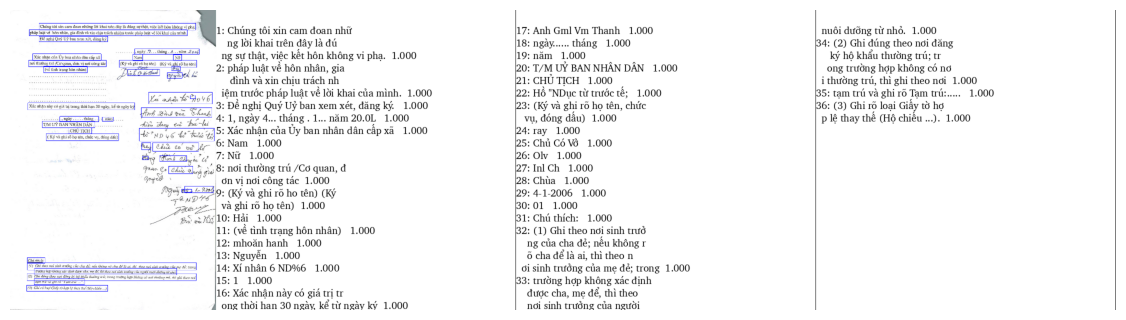

[[222, 101], [1423, 153]]: Chúng tôi xin cam đoan những lời khai trên đây là đúng sự thật, việc kết hôn không vi phạ.
[[147, 152], [1359, 198]]: pháp luật về hôn nhân, gia đình và xin chịu trách nhiệm trước pháp luật về lời khai của mình.
[[222, 200], [750, 244]]: Đề nghị Quý Uỷ ban xem xét, đăng ký.
[[956, 298], [1451, 339]]: 1, ngày 4... tháng . 1... năm 20.0L
[[173, 336], [698, 387]]: Xác nhận của Ủy ban nhân dân cấp xã
[[942, 338], [1018, 388]]: Nam
[[1252, 343], [1317, 387]]: Nữ
[[142, 384], [738, 435]]: nơi thường trú /Cơ quan, đơn vị nơi công tác
[[836, 386], [1432, 440]]: (Ký và ghi rõ ho tên) (Ký và ghi rõ họ tên)
[[1238, 430], [1305, 466]]: Hải
[[257, 430], [592, 481]]: (về tình trạng hôn nhân)
[[901, 454], [1146, 504]]: mhoăn hanh
[[1205, 480], [1319, 522]]: Nguyễn
[[1062, 631], [1550, 720]]: Xí nhân 6 ND%6
[[1382, 655], [1420, 680]]: 1
[[137, 712], [957, 766]]: Xác nhận này có giá trị trong thời hạn 30 ngày, kể từ ngày ký
[[1005, 749], [1548, 823]]: Anh Gml Vm Thanh
[[382, 

In [19]:
input_path = '/content/drive/MyDrive/doan/3.jpg'
output_path = '/content/'

# Predict
boxes, texts = predict(recognitor, detector, input_path, output_path, padding=2, dpi=200)
for i, (box, text) in enumerate(zip(boxes, texts)):
  print("{}: {}".format(box, text))